# GA Lab: iPython Notebook / Python

## iPython Notebook

- Shift + Enter executes the current highlight cell
- Shift + Tab help for current command

In [4]:
from IPython.core.display import HTML 
HTML("<iframe src=http://www.nature.com/news/ipython-interactive-demo-7.21492 width=1000 height=800></iframe>")

### import statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

### execute shell commands

In [6]:
!ls -la

total 48
drwxr-xr-x  5 SL  staff    170 Apr 30 19:50 .
drwxr-xr-x  9 SL  staff    306 Apr 30 19:47 ..
drwxr-xr-x  3 SL  staff    102 Apr 30 19:52 .ipynb_checkpoints
-rw-r--r--  1 SL  staff  18005 Apr 30 20:02 1_intro_to_ipython.ipynb
-rw-r--r--  1 SL  staff   1308 Apr 30 19:47 2_simple_plot.ipynb


### send shell commands to variable

In [10]:
home_drive = !ls ~
home_drive
print type (home_drive)

<class 'IPython.utils.text.SList'>


#### Shell magic!

In [11]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%perl  %%pr

In [24]:
%timeit 
a = np.random.rand(100, 100)
len(a)

### line magic: start with single % (runon the single line)
### cell magic: start with two % (run on the whole block/cell)

100

In [22]:
a = 10
print a
%reset
print a

b = 10

10
Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.
10


In [27]:
%%time
mu, sigma = 0, 0.1
normal_dist = np.random.normal(mu, sigma, 1000)

CPU times: user 149 µs, sys: 20 µs, total: 169 µs
Wall time: 108 µs


[-0.19460791  0.10986359 -0.07025861  0.04933378 -0.15148825  0.04644141
  0.02668911  0.05564965 -0.00597412 -0.08937193]
Help on function hist in module matplotlib.pyplot:

hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype=u'bar', align=u'mid', orientation=u'vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array

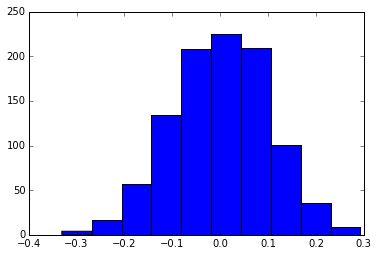

In [32]:
print normal_dist[:10]
plt.hist(normal_dist)
help(plt.hist)

(array([   4.,   17.,   57.,  134.,  208.,  225.,  209.,  101.,   36.,    9.]),
 array([-0.33097512, -0.26853735, -0.20609958, -0.14366181, -0.08122403,
        -0.01878626,  0.04365151,  0.10608929,  0.16852706,  0.23096483,
         0.2934026 ]),
 <a list of 10 Patch objects>)

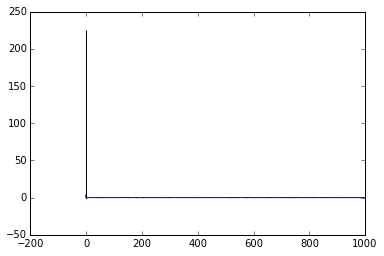

In [33]:
plt.plot(normal_dist)
plt.hist(normal_dist)


In [34]:
import pandas.io.data
import datetime
aapl = pd.io.data.get_data_yahoo('FB', 
                                 start=datetime.datetime(2015, 4, 1), 
                                 end=datetime.datetime(2015, 4, 28))
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-01,82.50,82.72,80.87,81.67,22058200,81.67
2015-04-02,82.25,82.56,81.44,81.56,19664100,81.56
2015-04-06,80.80,82.81,80.80,82.44,19062900,82.44
2015-04-07,82.65,83.42,82.22,82.32,17467000,82.32
2015-04-08,82.63,83.10,81.84,82.28,18966700,82.28


## Plotting!

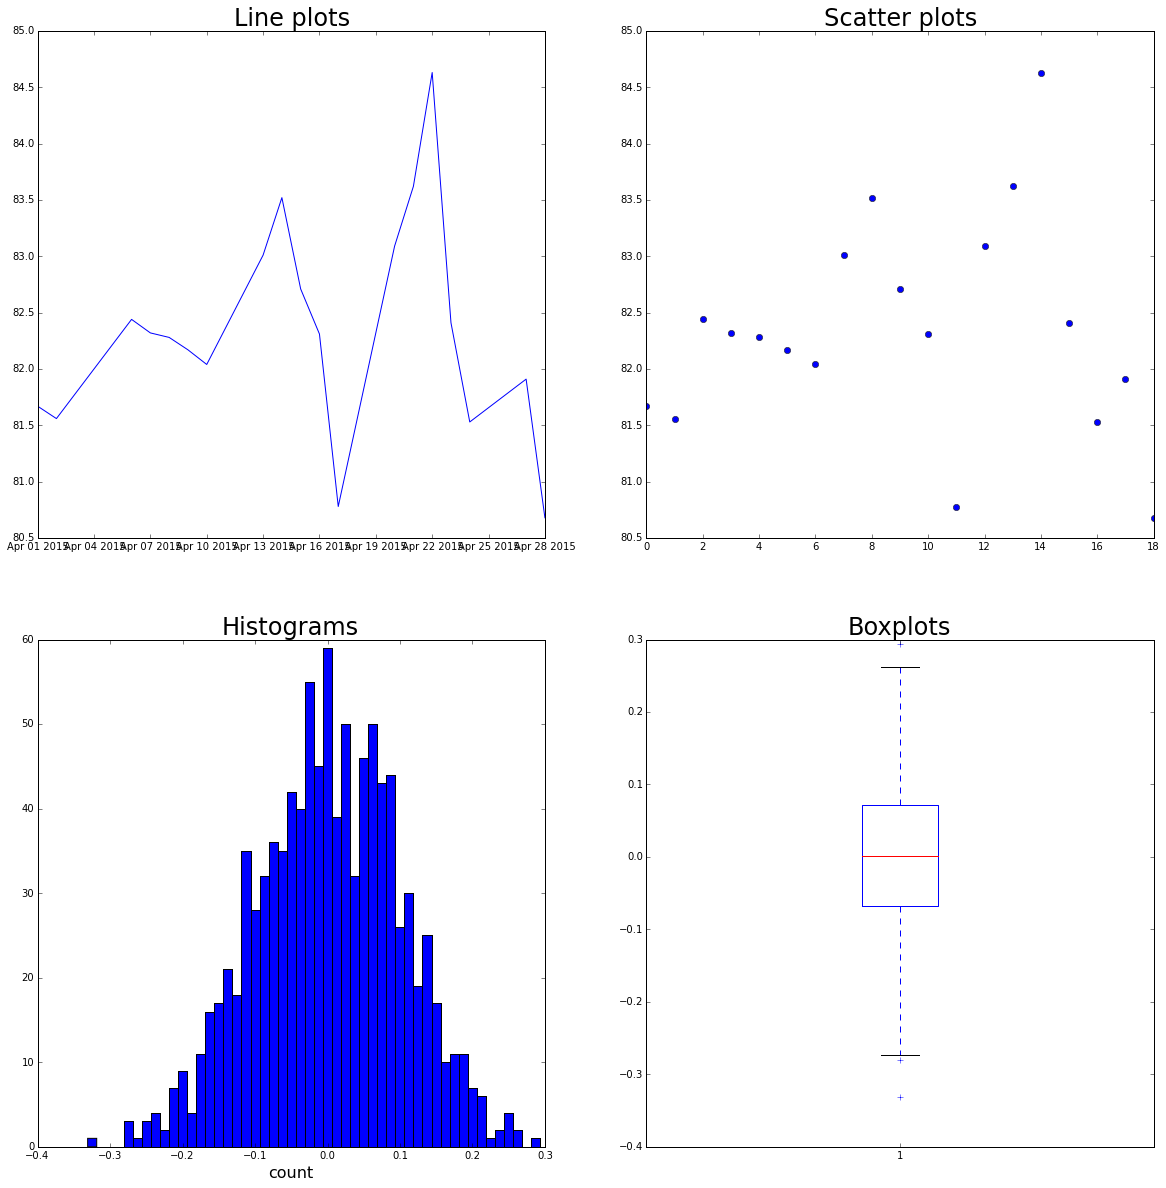

In [35]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(2,2,1)
ax.plot(aapl.index, aapl['Close'])
ax.set_title('Line plots', size=24)

ax = fig.add_subplot(2,2,2)
ax.plot(aapl['Close'], 'o')
ax.set_title('Scatter plots', size=24)

ax = fig.add_subplot(2,2,3)
ax.hist(normal_dist, bins=50)
ax.set_title('Histograms', size=24)
ax.set_xlabel('count', size=16)

ax = fig.add_subplot(2,2,4)
ax.boxplot(normal_dist)
ax.set_title('Boxplots', size=24)
print

## 1. Python Data types

In [36]:
type(42)

int

In [39]:
type (4.0)

float

In [42]:
from math import pi
type(pi)
print pi
import math
math.pow(pi, 2)

3.14159265359


9.869604401089358

In [43]:
type('matt')

str

In [45]:
type(u'matt')

unicode

## 2. Basic Python execution

In [46]:
test_integer = 42
test_float = pi
test_string = 'matt'

#### Basic print

In [47]:
print (test_integer, test_float, test_string)

(42, 3.141592653589793, 'matt')


#### C-style formatting

In [48]:
print ("%d %f %s") % (test_integer, test_float, test_string)
print ("%d %.2f %s") % (test_integer, test_float, test_string)


42 3.141593 matt
42 3.14 matt


#### Format - the pythonic way

In [49]:
print ("{} {} {}").format(test_integer, test_float, test_string)
print ("{} {:.2f} {}").format(test_integer, test_float, test_string)

42 3.14159265359 matt
42 3.14 matt


## Python operations

In [50]:
1 + 2.5

3.5

In [52]:
'matt' + 1.0

TypeError: cannot concatenate 'str' and 'float' objects

In [54]:
print ("{}{}")'matt' + 1

SyntaxError: invalid syntax (<ipython-input-54-941453cc4526>, line 1)

### Python 2.7 division

In [55]:
numerator, denominator = 1,2

#### Important to remember:

In [56]:
print (numerator / denominator) ### 1/2 = 

0


In [61]:
print (numerator / float denomenator) 

SyntaxError: invalid syntax (<ipython-input-61-b6e6db6a38f7>, line 1)

In [ ]:
print (numerator / float(denominator))

In [ ]:
print 1/2
from __future__ import division
print 1/2

### 3. Python Data Structures

## Lists [ ]

- aka arrays
- ordered
- mutable
- mixed types 

In [62]:
price_per_sq_foot = [300,324,220,976,347,888,134,95,567,1400,120]
type(price_per_sq_foot)

list

#### list operations:

In [65]:
#Number of elements in the list
print "There are {} elements in the list".format(len(price_per_sq_foot))
print

#Add an item to the end of the list
price_per_sq_foot.append(1000)
print "Updated price per square foot"
print (price_per_sq_foot)

#Remove and return most recent element
last_element = price_per_sq_foot.pop()

# testing data list

print "Last in, updated price per sq foot"
print (last_element, price_per_sq_foot)

#Sort the array
print "Sorted list"
print sorted(price_per_sq_foot)

#Reverse order
print "Reverse order"
print sorted(price_per_sq_foot)[::-1]

There are 11 elements in the list

Updated price per square foot
[300, 324, 220, 976, 347, 888, 134, 95, 567, 1400, 120, 1000]
Last in, updated price per sq foot
(1000, [300, 324, 220, 976, 347, 888, 134, 95, 567, 1400, 120])
Sorted list
[95, 120, 134, 220, 300, 324, 347, 567, 888, 976, 1400]
Reverse order
[1400, 976, 888, 567, 347, 324, 300, 220, 134, 120, 95]


#### List slicing

In [66]:
#First element
sorted_ppsf = sorted(price_per_sq_foot)
print "First element"
print 'Cheapest: {}'.format(sorted_ppsf[0])
print 
print "Last element"
print 'Most expensive: {}'.format(sorted_ppsf[len(sorted_ppsf) - 1])
#or
print 'Most expensive: {}'.format(sorted_ppsf[-1])

First element
Cheapest: 95

Last element
Most expensive: 1400
Most expensive: 1400


## Tuples ( )

- immutable
- can't change / sort
- functional programming

In [71]:
test = (1, 2, 3, 4)
print test[0]
print test[1]
#test[0] = test[1]

1
2


## Dictionary { }

- aka associate arrays / key-value pairs
- mutable
- unordered

In [72]:
#Can contain multiple types
employee_info = {'id': 123, 'name': 'Matthew', 'manages': [45,67,90], 'managed_by': 2}
print "Name {}: Headcount: {}".format(employee_info['name'], len(employee_info['manages']))

Name Matthew: Headcount: 3


In [73]:
offensive_skill_dict = {'RB': 'Running Back', 'WR': 'Wide Receiver', 'QB': 'Quarterback', 'FB': 'Full back', 'TE': 'Tight End'}
print offensive_skill_dict

{'FB': 'Full back', 'QB': 'Quarterback', 'WR': 'Wide Receiver', 'RB': 'Running Back', 'TE': 'Tight End'}


In [74]:
print offensive_skill_dict.keys()

['FB', 'QB', 'WR', 'RB', 'TE']


### Sets

- unique
- cool operations

In [75]:
#remove redundant entries
list_list = [1,1,2,4,6,8,3,1,2,4,5]
set_list = set(list_list)
print set_list

set([1, 2, 3, 4, 5, 6, 8])


In [76]:
#Set operations
panel_a, panel_b = set(('BRCA1', 'BRCA2', 'TP53', 'CHEK2', 'MYC')), set(('CHEK2', 'SPHK1', 'MYCN', 'MYC'))

print "Genes in panel 1 but not in panel b: {}\n".format((panel_a - panel_b))
print "Genes in both panels (Intersection): {}\n".format(panel_a & panel_b)
print "All the genes: {}\n".format(panel_a | panel_b)
print "Genes in A that aren't in B, genes in B that aren't in A (symmetric difference): {}\n".format(panel_a ^ panel_b)


Genes in panel 1 but not in panel b: set(['BRCA1', 'BRCA2', 'TP53'])

Genes in both panels (Intersection): set(['MYC', 'CHEK2'])

All the genes: set(['BRCA1', 'MYCN', 'SPHK1', 'BRCA2', 'TP53', 'MYC', 'CHEK2'])

Genes in A that aren't in B, genes in B that aren't in A (symmetric difference): set(['BRCA1', 'MYCN', 'SPHK1', 'BRCA2', 'TP53'])



### 4. flow control

### iterating through a list

In [78]:
my_list = ['Jimmy Carter','Ronald Regan','George Bush','Bill Clinton', 'George HW Bush', 'Barack Obama']

In [79]:
#Not the best way
for index , presidentin range(0, len(my_list)):
    print my_list[index]

SyntaxError: invalid syntax (<ipython-input-79-7c2bc550ca43>, line 2)

In [82]:
#Better
for president in my_list:
    print (president)

Jimmy Carter
Ronald Regan
George Bush
Bill Clinton
George HW Bush
Barack Obama


In [81]:
#what if I want the index too
for index, president in enumerate(my_list):
    print index, president

0 Jimmy Carter
1 Ronald Regan
2 George Bush
3 Bill Clinton
4 George HW Bush
5 Barack Obama


In [80]:
#list comprehension - this is pythonic - and faster!
[x for x in my_list]

['Jimmy Carter',
 'Ronald Regan',
 'George Bush',
 'Bill Clinton',
 'George HW Bush',
 'Barack Obama']

#### Faster?

In [83]:
%%timeit
result = []
for x in range(1,10000):
    for y in range(1,10000):
        result.append(x)
len(result)

1 loops, best of 3: 7.78 s per loop


In [85]:
%%timeit
field = [x for x in range(1,10000) for y in range(1,10000)]
len(field)

1 loops, best of 3: 3.53 s per loop


In [ ]:
zip

In [86]:
a = [1, 2, 3]
b = ['a', 'b', 'c']
zip(a, b)

[(1, 'a'), (2, 'b'), (3, 'c')]

In [87]:
label = ['yes', 'no', 'yes']
data = ['a', 'b', 'c']
zip(label, data)

[('yes', 'a'), ('no', 'b'), ('yes', 'c')]

In [88]:
map

<function map>

In [89]:
map(len, label)
[3, 2, 3]

[3, 2, 3]

In [92]:
map(filter_function, raw_data)

NameError: name 'filter_function' is not defined

In [96]:
g = lambda x: x**2
g(3)

9

In [94]:
comprehensions

NameError: name 'comprehensions' is not defined

In [97]:
g = lambda x: x**2
g(3)

9

### Additional Resources

Web based viewer for ipython notebooks
http://nbviewer.ipython.org/